<div style="background-color: #eee3d3">
<h1> 6-clustering.ipynb </h1>
</div>

---

# The purpose of this notebook is to use different methods to cluster samples or features

- ## KMeans
    - ### cluster samples
    - ### cluster features
    

---

## References 

- https://pubmed.ncbi.nlm.nih.gov/30421236/
- https://pubs.acs.org/doi/10.1021/acs.analchem.9b03084

# Import modules

In [1]:
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl


import numpy as np
import pandas as pd

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [3]:
import re
pwd = ! pwd
pwd = re.sub('notebooks', '', pwd[0])
print(f'Working directory : {pwd}')

import sys
sys.path.append(pwd + 'bin/')

from clustering_functions import *

Working directory : /home/jovyan/work/


In [34]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 12, 8

sns.set_theme(style="darkgrid")

# Import reduced data from previous notebook

In [5]:
path_peakTable = pwd + 'data/peakTable/reduced_peakTable/'
reduced_peakTables = [file for file in os.listdir(path_peakTable) if file.endswith('.csv')]
print(f'Available reduced peak tables :\n')
reduced_peakTables

Available reduced peak tables :



['peakTable-PCA_70percent.csv',
 'peakTable-PCA_95percent-UMAP_3comp.csv',
 'peakTable-PCA_95percent-tSNE_2comp.csv',
 'peakTable-PCA_95percent-tSNE_3comp.csv',
 'peakTable-PCA_95percent.csv',
 'peakTable-UMAP_2comp.csv',
 'peakTable-UMAP_3comp.csv',
 'peakTable-kBest_20.csv',
 'peakTable-kBest_34.csv',
 'peakTable-kBest_61.csv',
 'peakTable-tSNE_2comp.csv',
 'peakTable-tSNE_3comp.csv']

In [6]:
chosen_peakTable = 'peakTable-PCA_95percent-tSNE_2comp.csv'
peakTable = pd.read_csv(path_peakTable + chosen_peakTable, sep=',', decimal='.', na_values='NA')
peakTable

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,tSNE1,tSNE2
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C,0.417830,2.124474
1,LivCan_154,Non-case,82,Non-case,No,41____41046868,41____41046868,41046868-s2#C,-2.548371,-0.418698
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B,0.366884,0.928238
3,LivCan_268,Non-case,427,Non-case,No,41____41089214,41____41089214,41089214-s1#B,-0.324994,1.480722
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B,-1.461150,-0.460158
...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,Non-case,No,32____3208004E,32____32253231,32253231-s3#C,-0.791154,-1.103697
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B,-1.397257,0.089465
183,LivCan_376,Non-case,383,Non-case,No,22____22281701,22____22281701,22281701-s1#B,-0.475833,0.256047
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C,-0.800170,-1.150811


In [7]:
col_prefix = re.sub('peakTable-', '', re.sub('.csv', '', chosen_peakTable)).split('-')[-1].split('_')[0]
if col_prefix == 'kBest' : col_prefix = 'variable_'
if col_prefix == 'PCA' : col_prefix = 'PC'
col_prefix

'tSNE'

In [8]:
metadata = peakTable.iloc[:, [col_prefix not in col for col in peakTable.columns]]
metadata

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C
1,LivCan_154,Non-case,82,Non-case,No,41____41046868,41____41046868,41046868-s2#C
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B
3,LivCan_268,Non-case,427,Non-case,No,41____41089214,41____41089214,41089214-s1#B
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B
...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,Non-case,No,32____3208004E,32____32253231,32253231-s3#C
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B
183,LivCan_376,Non-case,383,Non-case,No,22____22281701,22____22281701,22281701-s1#B
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C


In [9]:
X = peakTable.iloc[:, [col_prefix in col for col in peakTable.columns]]
X

,tSNE1,tSNE2
0,0.417830,2.124474
1,-2.548371,-0.418698
2,0.366884,0.928238
3,-0.324994,1.480722
4,-1.461150,-0.460158
...,...,...
181,-0.791154,-1.103697
182,-1.397257,0.089465
183,-0.475833,0.256047
184,-0.800170,-1.150811


# We will create a dataframe in which each column will be cluster labels for a particular model, for each sample in rows

In [10]:
clustering_results = pd.DataFrame()

# K-Means

### Cluster samples

#### Reduce data with 2-component PCA to observe the results

#### With only 2 clusters (maybe Incident vs. Non-case will be separated)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


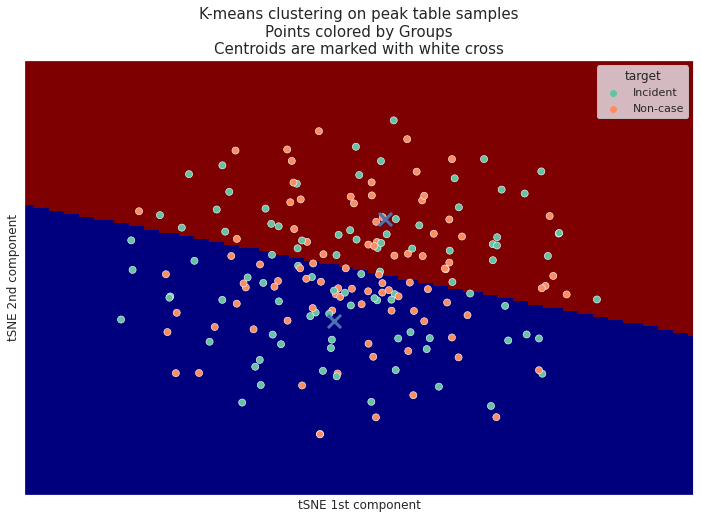

Inertia of k-means model : 289.50
Adjusted rand index of k-means model : -0.004


In [11]:
kmeans = perform_kmeans(X, n_clusters=2, target=peakTable['Groups'], col_prefix=col_prefix)

#### We can observe that the two groups don't separate at all. The adjusted rand index is close to 0 which means the predicted labels are bad prediction of the true labels

#### One major reason is that keeping only the 2 principal components for the PCA model only keeps a really small amount of the initial variance

In [12]:
clustering_results['kmeans_2'] = kmeans.labels_
clustering_results

,kmeans_2
0,1
1,0
2,1
3,1
4,0
...,...
181,0
182,0
183,0
184,0


#### With 3 clusters (maybe HCC vs. HCC_Wide vs. Non-case will be separated)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


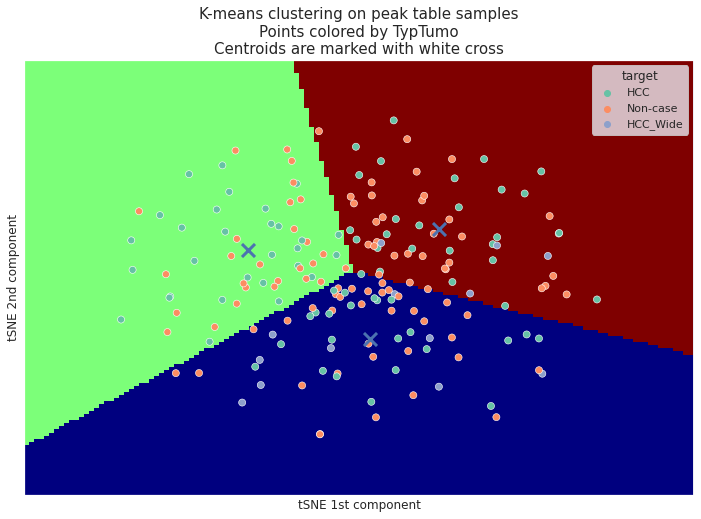

Inertia of k-means model : 193.14
Adjusted rand index of k-means model : -0.002


In [13]:
kmeans = perform_kmeans(X, n_clusters=3, target=peakTable['TypTumo'], col_prefix=col_prefix)

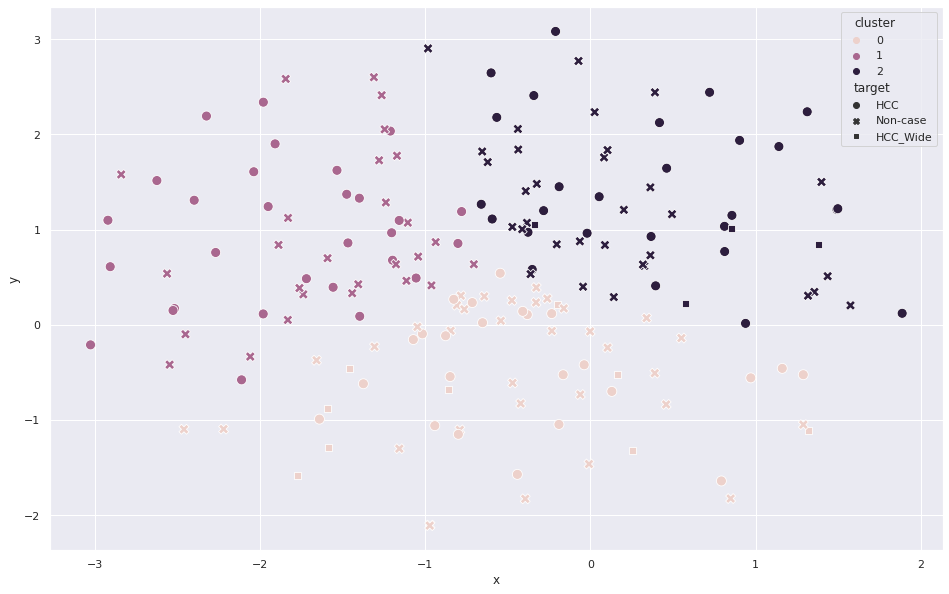

In [14]:
# Number of clusters for KMeans
n_clusters = 3

points = X.copy()
points.columns = ['x', 'y']
points['target'] = peakTable['TypTumo']
points['target'] = points['target'].fillna('Non-case')
points['cluster']= kmeans.labels_

plt.figure(figsize=(16,10))
sns.scatterplot(x='x',y='y',
                data=points,
                hue='cluster',
                style='target',
                s=100,
                legend='full')
plt.show()

#### Same here, we can observe that the three groups don't separate at all. The adjusted rand index is close to 0 which means the predicted labels are bad prediction of the true labels

In [15]:
clustering_results['kmeans_3'] = kmeans.labels_
clustering_results

,kmeans_2,kmeans_3
0,1,2
1,0,1
2,1,2
3,1,2
4,0,0
...,...,...
181,0,0
182,0,1
183,0,0
184,0,0


### And with a higher number of clusters

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


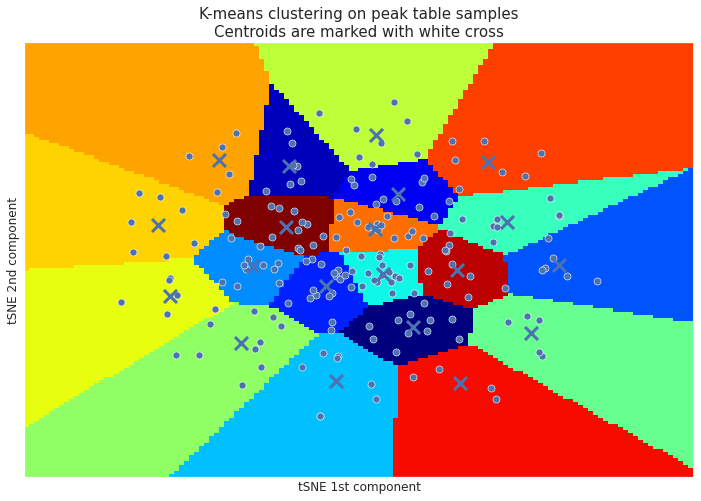

Inertia of k-means model : 26.57


In [16]:
kmeans = perform_kmeans(X, n_clusters=20, col_prefix=col_prefix)

In [17]:
clustering_results['kmeans_20'] = kmeans.labels_
clustering_results

,kmeans_2,kmeans_3,kmeans_20
0,1,2,16
1,0,1,12
2,1,2,8
3,1,2,2
4,0,0,10
...,...,...,...
181,0,0,6
182,0,1,5
183,0,0,7
184,0,0,6


## Here we plot the inertia and the randscore compared to the number of clusters

Maximum rand score is 0.00397, obtained with 13 clusters



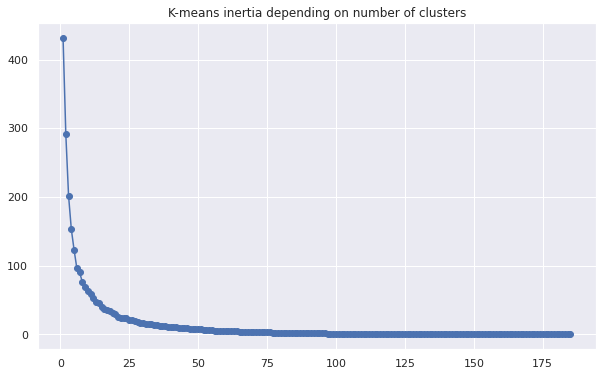

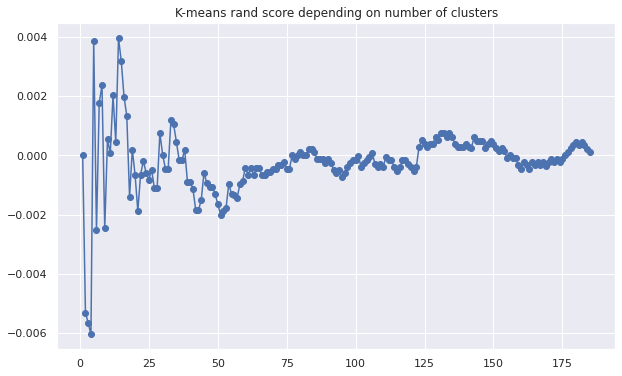

In [18]:
plot_inertia_and_randscore(X, target=peakTable['Groups'])

Maximum rand score is 0.01646, obtained with 4 clusters



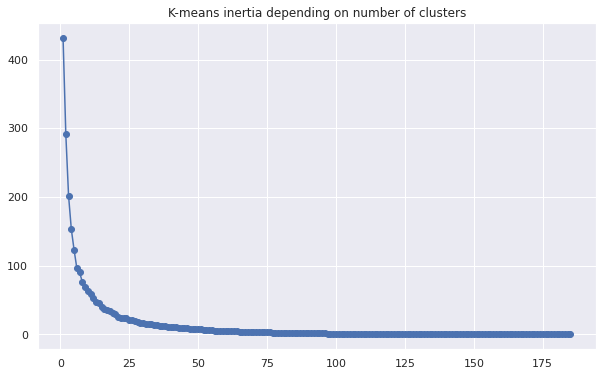

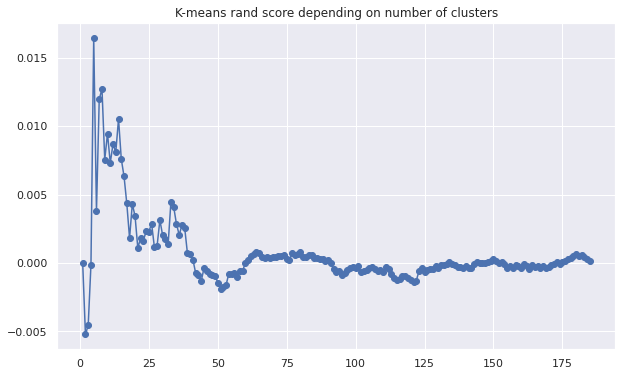

In [19]:
plot_inertia_and_randscore(X, target=peakTable['TypTumo'])

# Affinity propagation

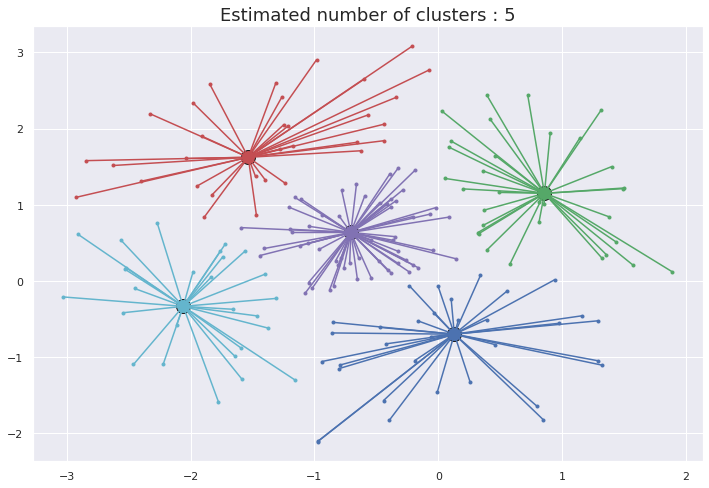

In [20]:
af = perform_affinity_propagation(X)

Estimated number of clusters: 5
Homogeneity: 0.032
Completeness: 0.018
V-measure: 0.023
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.004
Silhouette Coefficient: 0.485


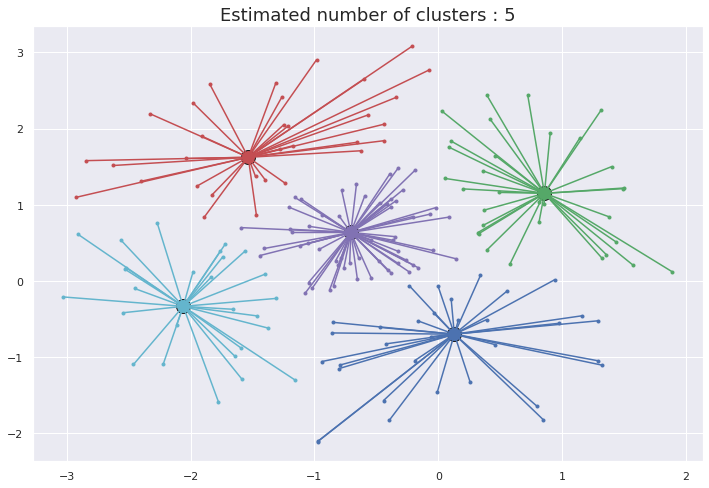

In [21]:
af = perform_affinity_propagation(X, target=peakTable['TypTumo'])

In [22]:
clustering_results['af_5'] = af.labels_
clustering_results

,kmeans_2,kmeans_3,kmeans_20,af_5
0,1,2,16,1
1,0,1,12,3
2,1,2,8,1
3,1,2,2,4
4,0,0,10,3
...,...,...,...,...
181,0,0,6,0
182,0,1,5,3
183,0,0,7,4
184,0,0,6,0


# Mean shift

Estimated number of clusters : 1


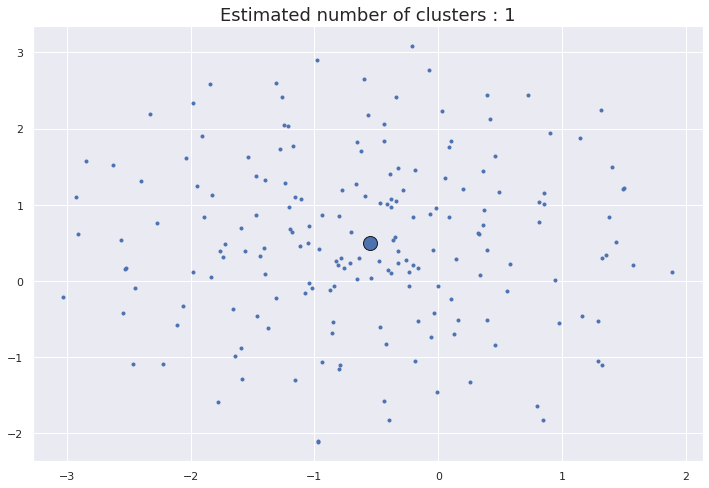

In [23]:
ms = perform_mean_shift(X)

In [24]:
clustering_results['ms_1'] = ms.labels_
clustering_results

,kmeans_2,kmeans_3,kmeans_20,af_5,ms_1
0,1,2,16,1,0
1,0,1,12,3,0
2,1,2,8,1,0
3,1,2,2,4,0
4,0,0,10,3,0
...,...,...,...,...,...
181,0,0,6,0,0
182,0,1,5,3,0
183,0,0,7,4,0
184,0,0,6,0,0


# Hierarchical clustering

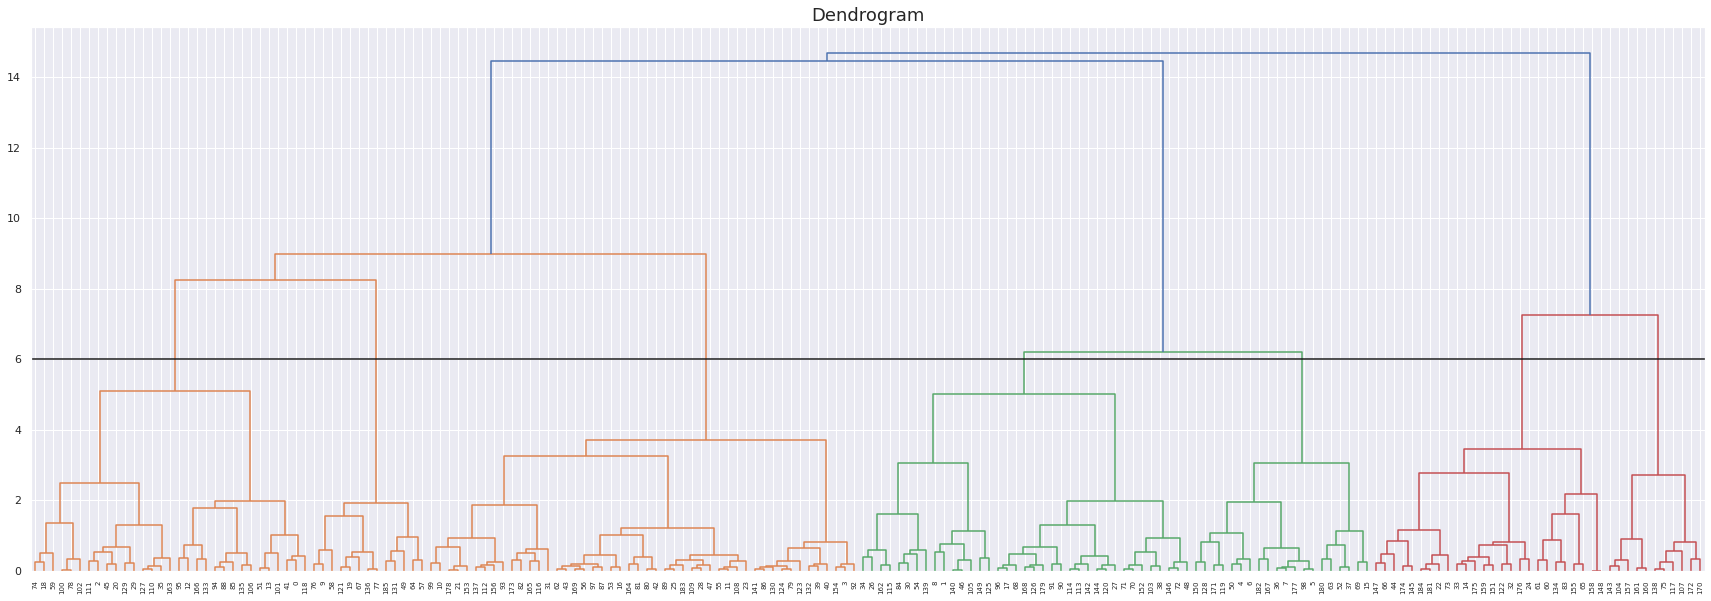

In [25]:
plot_dendrogram(X, hline=6)

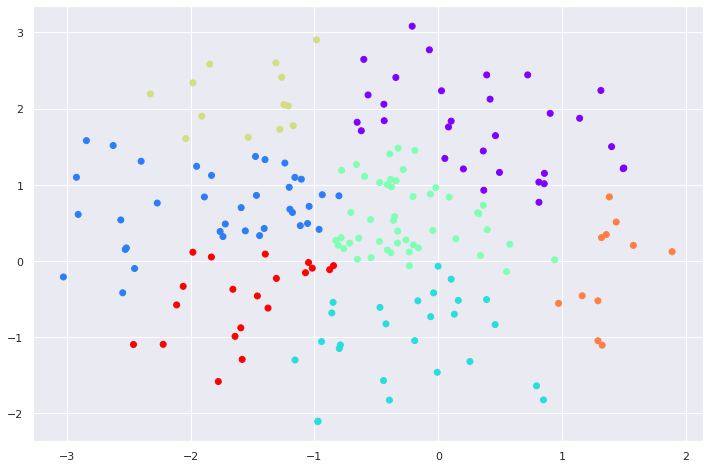

In [26]:
hc = perform_hierarchical_clustering(X, n_clusters=7)

In [27]:
clustering_results['hc_7'] = hc.labels_
clustering_results

,kmeans_2,kmeans_3,kmeans_20,af_5,ms_1,hc_7
0,1,2,16,1,0,0
1,0,1,12,3,0,1
2,1,2,8,1,0,0
3,1,2,2,4,0,3
4,0,0,10,3,0,6
...,...,...,...,...,...,...
181,0,0,6,0,0,2
182,0,1,5,3,0,6
183,0,0,7,4,0,3
184,0,0,6,0,0,2


# DBSCAN

Estimated number of clusters: 1
Estimated number of noise points: 161
Homogeneity: 0.004
Completeness: 0.009
V-measure: 0.006
Adjusted Rand Index: -0.014
Adjusted Mutual Information: -0.004
Silhouette Coefficient: -0.128


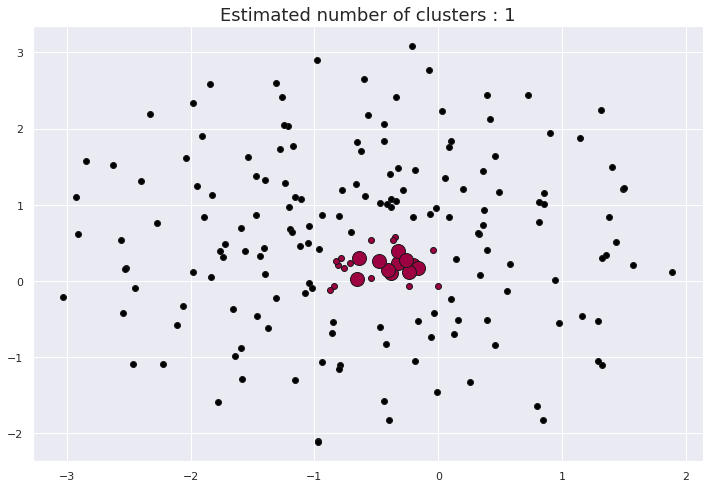

In [28]:
db = perform_DBSCAN(X, target=peakTable['TypTumo'])

In [29]:
clustering_results['db_1'] = db.labels_
clustering_results

,kmeans_2,kmeans_3,kmeans_20,af_5,ms_1,hc_7,db_1
0,1,2,16,1,0,0,-1
1,0,1,12,3,0,1,-1
2,1,2,8,1,0,0,-1
3,1,2,2,4,0,3,-1
4,0,0,10,3,0,6,-1
...,...,...,...,...,...,...,...
181,0,0,6,0,0,2,-1
182,0,1,5,3,0,6,-1
183,0,0,7,4,0,3,0
184,0,0,6,0,0,2,-1


# OPTICS

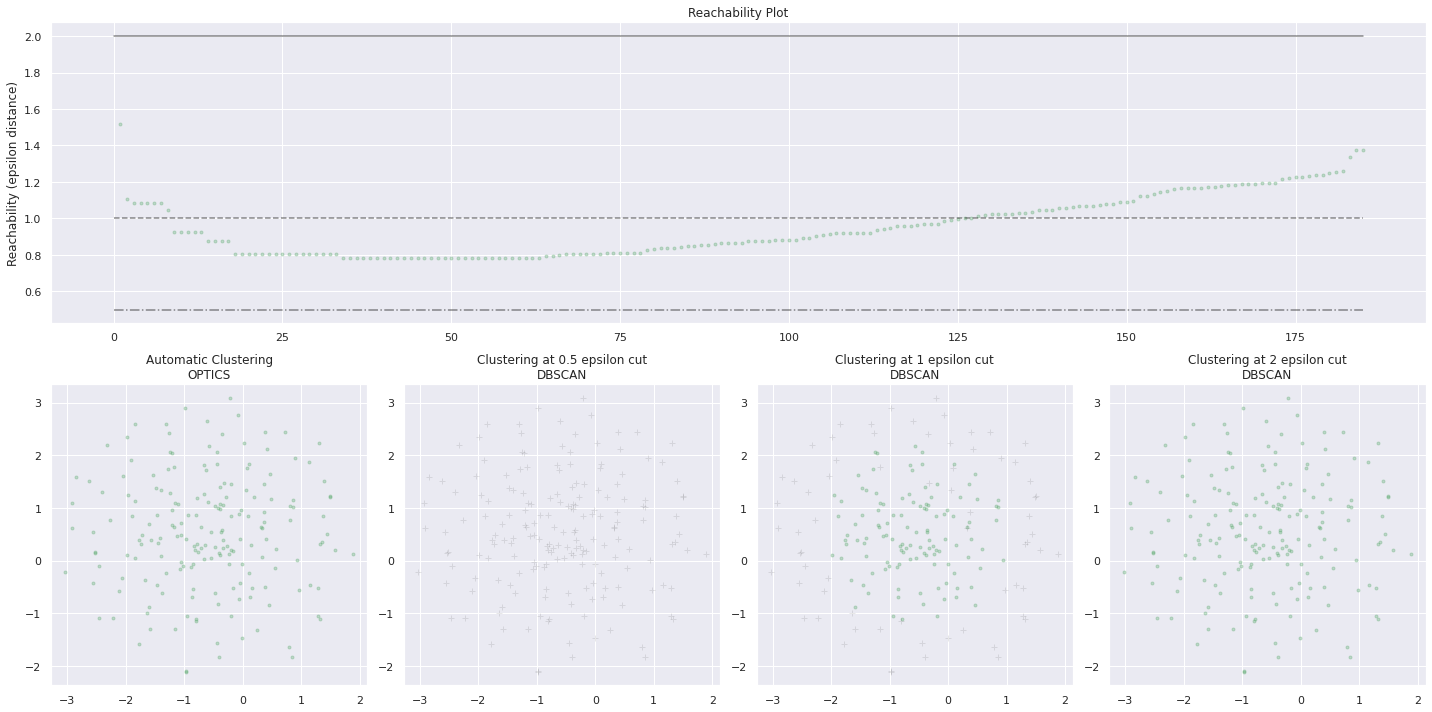

In [30]:
optics = perform_OPTICS(X)

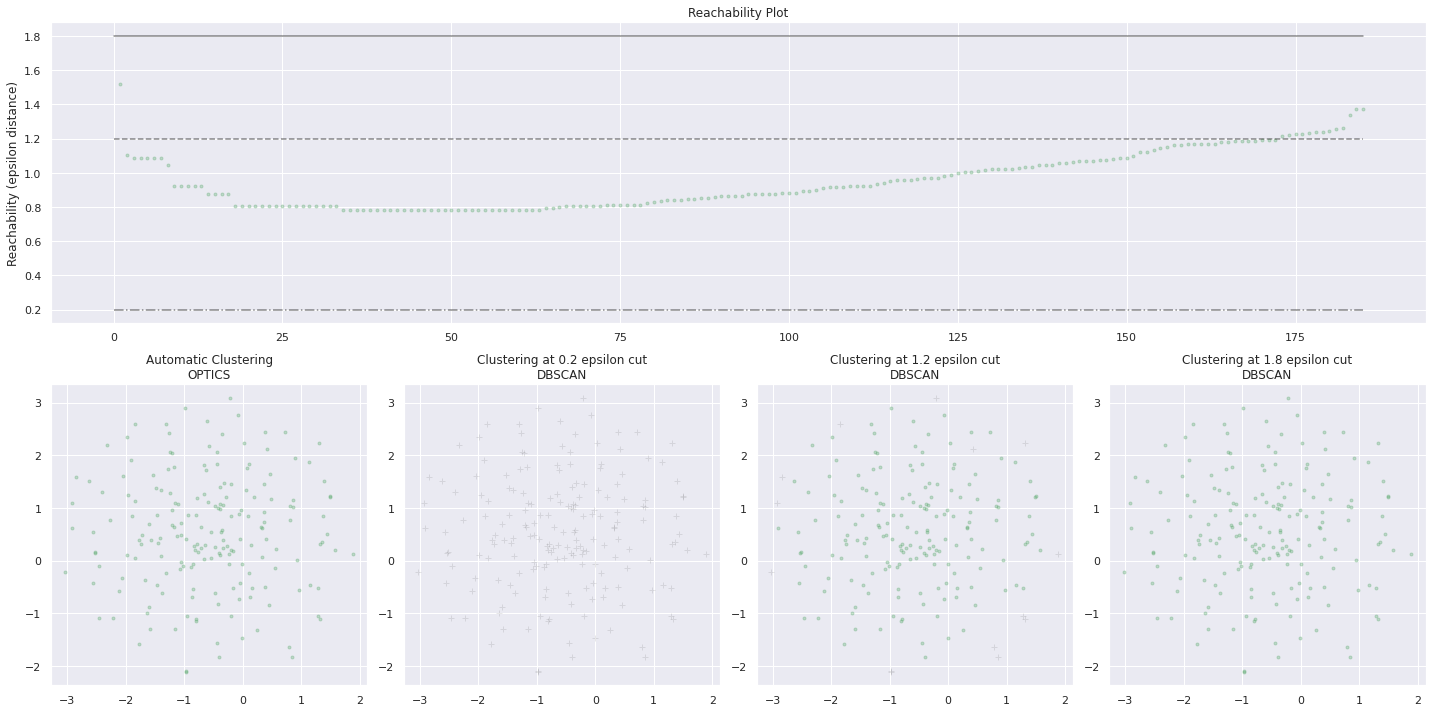

In [31]:
optics = perform_OPTICS(X, list_eps=[0.2, 1.2, 1.8])

In [32]:
clustering_results['clust_1'] = optics.labels_
clustering_results

,kmeans_2,kmeans_3,kmeans_20,af_5,ms_1,hc_7,db_1,clust_1
0,1,2,16,1,0,0,-1,0
1,0,1,12,3,0,1,-1,0
2,1,2,8,1,0,0,-1,0
3,1,2,2,4,0,3,-1,0
4,0,0,10,3,0,6,-1,0
...,...,...,...,...,...,...,...,...
181,0,0,6,0,0,2,-1,0
182,0,1,5,3,0,6,-1,0
183,0,0,7,4,0,3,0,0
184,0,0,6,0,0,2,-1,0


In [33]:
pd.concat([peakTable, clustering_results], axis=1)

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,tSNE1,tSNE2,kmeans_2,kmeans_3,kmeans_20,af_5,ms_1,hc_7,db_1,clust_1
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C,0.417830,2.124474,1,2,16,1,0,0,-1,0
1,LivCan_154,Non-case,82,Non-case,No,41____41046868,41____41046868,41046868-s2#C,-2.548371,-0.418698,0,1,12,3,0,1,-1,0
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B,0.366884,0.928238,1,2,8,1,0,0,-1,0
3,LivCan_268,Non-case,427,Non-case,No,41____41089214,41____41089214,41089214-s1#B,-0.324994,1.480722,1,2,2,4,0,3,-1,0
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B,-1.461150,-0.460158,0,0,10,3,0,6,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,Non-case,No,32____3208004E,32____32253231,32253231-s3#C,-0.791154,-1.103697,0,0,6,0,0,2,-1,0
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B,-1.397257,0.089465,0,1,5,3,0,6,-1,0
183,LivCan_376,Non-case,383,Non-case,No,22____22281701,22____22281701,22281701-s1#B,-0.475833,0.256047,0,0,7,4,0,3,0,0
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C,-0.800170,-1.150811,0,0,6,0,0,2,-1,0
